Dropped Index: 24
Dropped Index: 45
Dropped Index: 53
Dropped Index: 80
Dropped Index: 81
Dropped Index: 87
Dropped Index: 92
Dropped Index: 104
Dropped Index: 105
Dropped Index: 117
Dropped Index: 124
Dropped Index: 239
Dropped Index: 244


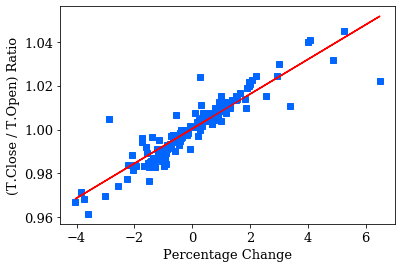

In [1]:
import matplotlib.pyplot as plt
from DataAnalytics import preprocess
import numpy as np


def map_plot(x, y):
    x_data = np.array(x)
    y_data = np.array(y)

    plt.rc('font', family='serif', size=13)
    m, b = np.polyfit(x_data, y_data, 1)

    plt.plot(x_data, y_data, 's', color='#0066FF')
    plt.plot(x_data, m * x_data + b, 'r-')
    plt.xlabel('Percentage Change')
    plt.ylabel('(T.Close / T.Open) Ratio')
    plt.autoscale(enable=True, axis=u'both', tight=False)
    plt.grid(False)
    plt.xlim()
    plt.ylim()
    plt.show()


def create_data_for_model(dataset):
    x = []
    y = []
    dataDictionary = {}

    for key1 in dataset:
        pct = dataDictionary.get(dataset[key1].get('PCT_CHANGE'))
        if not bool(pct):
            dataDictionary[dataset[key1].get('PCT_CHANGE')] = datarow = {'RATIO': float(dataset[key1].get('T.CLOSE') / dataset[key1].get('T.OPEN'))}
        else:
            ratio = pct.get('RATIO');

            if (float(dataset[key1].get('T.CLOSE') / dataset[key1].get('T.OPEN')) > ratio):
                dataDictionary[dataset[key1].get('PCT_CHANGE')] = datarow = {'RATIO': float(dataset[key1].get('T.CLOSE') / dataset[key1].get('T.OPEN'))}


    for key in dataDictionary:
        x.append(key)
        y.append(dataDictionary[key].get('RATIO'))

    return x, y


def create_models(data):
    x, y = create_data_for_model(data)
    map_plot(x, y)


def prescriptive(dataFile):
    dict_data = preprocess(dataFile, False)
    create_models(dict_data)


prescriptive('1150_HISTORY_ADJUSTED_2019.xlsx')

